Passo 1: Importando os módulos necessários

In [29]:
import pandas as pd
import datetime 
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib 
from email.message import EmailMessage



Passo 2: pegar dados no Yahho Finance

In [30]:
ativos = ["^BVSP", "BRL=X"]


hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)


dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                     High  \
               BRL=X          ^BVSP   BRL=X          ^BVSP     BRL=X   
Date                                                                   
2022-04-05    4.5938  118885.000000  4.5938  118885.000000  4.669100   
2022-04-06    4.6507  118228.000000  4.6507  118228.000000  4.712600   
2022-04-07    4.7152  118862.000000  4.7152  118862.000000  4.769900   
2022-04-08    4.7521  118322.000000  4.7521  118322.000000  4.791300   
2022-04-11    4.6981  116953.000000  4.6981  116953.000000  4.732600   
...              ...            ...     ...            ...       ...   
2023-03-29    5.1644  101793.000000  5.1644  101793.000000  5.182300   
2023-03-30    5.1342  103713.000000  5.1342  103713.000000  5.155928   
2023-03-31    5.0927  101882.000000  5.0927  101882.000000  5.103300   
2023-04-03    5.0623  101506.000000  5.0623  101506.000000  5.075500   
2023-04-04    5.0631  101869.453125  5.0631  101869.453125  5.097600   

                                Low                   Open                 \
                    ^BVSP     BRL=X          ^BVSP   BRL=X          ^BVSP   
Date                                                                        
2022-04-05  121628.000000  4.575500  118794.000000  4.5938  121279.000000   
2022-04-06  118885.000000  4.647900  116791.000000  4.6507  118885.000000   
2022-04-07  119247.000000  4.690400  117509.000000  4.7152  118226.000000   
2022-04-08  118868.000000  4.707518  117487.000000  4.7521  118861.000000   
2022-04-11  118320.000000  4.684016  116953.000000  4.6980  118320.000000   
...                   ...       ...            ...     ...            ...   
2023-03-29  102213.000000  5.131730  100248.000000  5.1644  101185.000000   
2023-03-30  104085.000000  5.077300  101796.000000  5.1342  101796.000000   
2023-03-31  104041.000000  5.055200  101476.000000  5.0927  103714.000000   
2023-04-03  101916.000000  5.036216  100651.000000  5.0623  101883.000000   
2023-04-04  103055.921875  5.048277  101504.820312  5.0631  101504.820312   

           Volume              
            BRL=X       ^BVSP  
Date                           
2022-04-05      0  11788300.0  
2022-04-06      0  13410800.0  
2022-04-07      0  11520100.0  
2022-04-08      0  11225800.0  
2022-04-11      0   9558400.0  
...           ...         ...  
2023-03-29      0  12456100.0  
2023-03-30      0  14901600.0  
2023-03-31      0  15111200.0  
2023-04-03      0  12794800.0  
2023-04-04      0         0.0  

[261 rows x 12 columns]

Passo 3.1: Manipular os dados - seleçao e exclusao de dados

In [31]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['Dolar', 'Ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,Dolar,Ibovespa
Date,,
2022-04-05,4.5938,118885.000000
2022-04-06,4.6507,118228.000000
2022-04-07,4.7152,118862.000000
2022-04-08,4.7521,118322.000000
2022-04-11,4.6981,116953.000000
...,...,...
2023-03-29,5.1644,101793.000000
2023-03-30,5.1342,103713.000000
2023-03-31,5.0927,101882.000000


Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes

In [32]:
dados_fechamento_mensal = dados_fechamento.resample('M').last()
dados_fechamento_anual = dados_fechamento.resample('Y').last()

dados_fechamento_anual

,Dolar,Ibovespa
Date,,
2022-12-31,5.2668,110031.000000
2023-12-31,5.0631,101869.453125


Passo 4: Calcular fechamento do dia anterior, retorno do mes e retorno no ano

In [33]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_dia

,Dolar,Ibovespa
Date,,
2022-04-06,0.012386,-0.005526
2022-04-07,0.013869,0.005363
2022-04-08,0.007826,-0.004543
2022-04-11,-0.011363,-0.011570
2022-04-12,-0.000958,-0.006892
...,...,...
2023-03-29,-0.006292,0.006009
2023-03-30,-0.005848,0.018862
2023-03-31,-0.008083,-0.017654


Passo 5: localizar o fechamento do dia anterior, retorno no mes e retorno no ano

In [34]:
retorno_dia_dolar  = retorno_no_dia.iloc[-1,0]
retorno_dia_ibovespa  = retorno_no_dia.iloc[-1,1]

retorno_mes_dolar  = retorno_no_mes.iloc[-1,0]
retorno_mes_ibovespa  = retorno_no_mes.iloc[-1,1]

retorno_ano_dolar  = retorno_no_ano.iloc[-1,0]
retorno_ano_ibovespa  = retorno_no_ano.iloc[-1,1]


In [35]:
retorno_dia_dolar  = round(retorno_dia_dolar * 100, 2)
retorno_dia_ibovespa  = round(retorno_dia_ibovespa * 100, 2)

retorno_mes_dolar  = round(retorno_mes_dolar * 100, 2) 
retorno_mes_ibovespa  = round(retorno_mes_ibovespa * 100, 2)

retorno_ano_dolar  = round(retorno_ano_dolar * 100, 2) 
retorno_ano_ibovespa  = round(retorno_dia_ibovespa * 100, 2) 

retorno_ano_ibovespa

36.0

Passo 6: fazer os graficos da performance do ultimo ano dos ativos

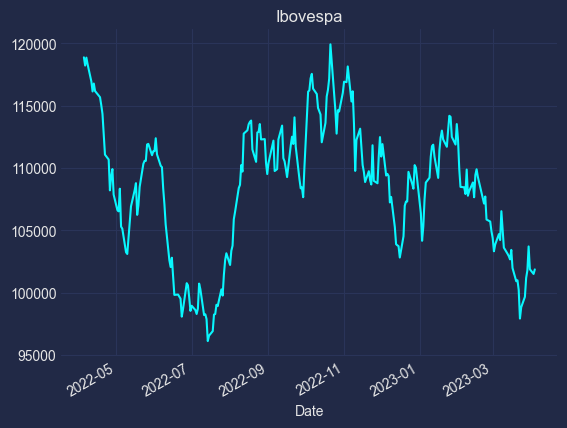

In [36]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'Ibovespa', use_index = True, legend = False)
plt.title('Ibovespa')
plt.savefig('ibovespa.png', dpi=300)
plt.show()

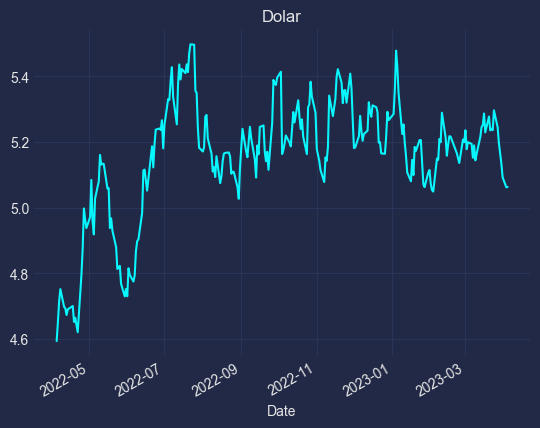

In [37]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'Dolar', use_index = True, legend = False)
plt.title('Dolar')
plt.savefig('dolar.png', dpi=300)
plt.show()

Passo 7:  Enviar o Email

In [38]:
import os
from dotenv import load_dotenv

In [39]:
load_dotenv()

True

In [40]:
senha = os.environ.get('senha')
email = 'belmontprogramador@gmail.com'
 


In [41]:
retorno_ano_ibovespa

36.0

In [42]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'belmontprogramador.com'
msg['To'] = 'brenno@varos.com.br'

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs,

O melhor estagiário do mundo

''')

In [43]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [44]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)